In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import itertools


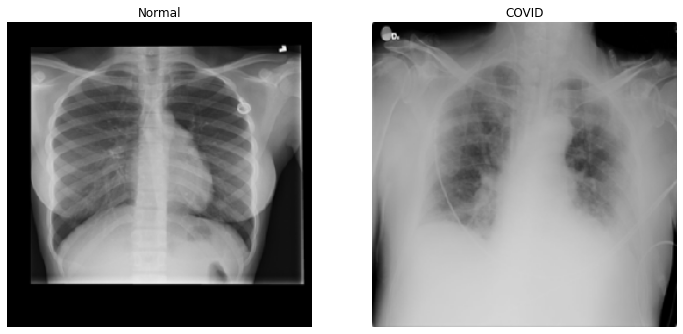

In [2]:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img('data/Normal/Normal-1.png', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Normal')

ax_2 = ax[1]
img2 = load_img('data/COVID/COVID-1.png', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('COVID')
plt.show()

## Image Data Generator

In [3]:
images = ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory = 'data',
        class_mode = 'binary',
        color_mode = 'grayscale',
        target_size = (128, 128),
        batch_size = 7232) 

Found 7232 images belonging to 2 classes.


In [4]:
images, labels = next(images)

In [5]:
pd.DataFrame(labels).value_counts()

1.0    3616
0.0    3616
dtype: int64

1.0


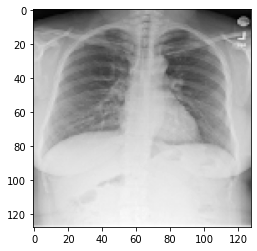

In [6]:
print(labels[0])
plt.imshow(images[0],cmap='gray')

## Train Test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state = 1)

In [8]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (5785, 128, 128, 1)
y_train shape (5785,)
x_test shape (1447, 128, 128, 1)
y_test shape (1447,)


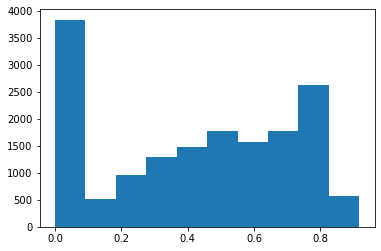

In [9]:
plt.hist(x_train[0].reshape(128*128))
plt.show()

In [10]:
x_train = x_train.reshape(5785, 16384)
x_test = x_test.reshape(1447, 16384)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [11]:
model = Sequential()
model.add(Dense(512, input_shape=(16384,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [12]:
# compiling the sequential model
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
# Training the model
model1 = model.fit(x_train, y_train,
          batch_size=128, epochs = 10,
          verbose=2,
          validation_data=(x_test, y_test),
                  workers = -1)

Epoch 1/10
46/46 - 3s - loss: 1.4271 - accuracy: 0.6258 - val_loss: 0.4921 - val_accuracy: 0.7540 - 3s/epoch - 59ms/step
Epoch 2/10
46/46 - 2s - loss: 0.4823 - accuracy: 0.7566 - val_loss: 0.4400 - val_accuracy: 0.7823 - 2s/epoch - 48ms/step
Epoch 3/10
46/46 - 2s - loss: 0.4497 - accuracy: 0.7808 - val_loss: 0.5729 - val_accuracy: 0.7194 - 2s/epoch - 48ms/step
Epoch 4/10
46/46 - 2s - loss: 0.4220 - accuracy: 0.7903 - val_loss: 0.4281 - val_accuracy: 0.7851 - 2s/epoch - 49ms/step
Epoch 5/10
46/46 - 2s - loss: 0.4140 - accuracy: 0.8022 - val_loss: 0.4115 - val_accuracy: 0.8072 - 2s/epoch - 48ms/step
Epoch 6/10
46/46 - 2s - loss: 0.4076 - accuracy: 0.7969 - val_loss: 0.3841 - val_accuracy: 0.8120 - 2s/epoch - 48ms/step
Epoch 7/10
46/46 - 2s - loss: 0.3853 - accuracy: 0.8150 - val_loss: 0.3944 - val_accuracy: 0.8072 - 2s/epoch - 48ms/step
Epoch 8/10
46/46 - 2s - loss: 0.3925 - accuracy: 0.8142 - val_loss: 0.3969 - val_accuracy: 0.8106 - 2s/epoch - 48ms/step
Epoch 9/10
46/46 - 2s - loss: 0.

In [14]:
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)
print('Train: ',results_train)
print('Test: ',results_test)

46/46 [==============================] - 0s 7ms/step - loss: 0.3780 - accuracy: 0.8279
Train:  [0.37055954337120056, 0.8283491730690002]
Test:  [0.3780379295349121, 0.8279198408126831]


In [15]:
confusion_matrix(y_test, np.around(model.predict(x_test)).astype('int'))

array([[534, 171],
       [ 78, 664]])

In [16]:
tn, fp, fn, tp = confusion_matrix(y_test, np.around(model.predict(x_test)).astype('int')).ravel()
tn, fp, fn, tp

(534, 171, 78, 664)